# Energie et environment en Belgique

Le dataset est tiré d'un site web gouvernemental:: http://ibsa.brussels/themes/environnement-et-energie?set_language=fr#.XHfBHuhKhXw 

Les données rassemblées ici portent sur le climat, la qualité de l’air, la consommation et la qualité de l’eau, les collectes de déchets, les espaces verts, la biodiversité, la consommation énergétique, etc.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
FIGSIZE = (12.0, 5.0)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

pd.options.display.max_rows = 55
pd.options.display.max_colwidth = 500

In [2]:
link1 = '12.1_environnement_energie_environnement_territoire_20180220.xlsx'
link2 = '12.2_environnement_energie_environnement_societe_20180829.xlsx'
link3 = '12.3_environnement_energie_energie_20180829.xlsx'

## Qualité de l'air en Bruxelles-Capitale 2005-2017

- Unités : microgrammes par mètre cube, heures\nÉchelle géographique : station de mesure\nSource : Bruxelles Environnement
- : = Non disponible (mesures non effectuées ou non fiables)
- x : Non existant (nouvelle station de mesure en 2013)
- c : Confidentiel (non communiqué)
- a1 : Valeur limite de 40 µg/m3 en tant que concentration moyenne annuelle à ne pas dépasser (à partir de 2010)
- a2 : Valeur limite de 200 µg/m3 en tant que valeur horaire, à ne pas dépasser plus de 18 fois par an (à partir de 2010)

#### Dataframes

- 1 concentrations en dioxyde d'azote (NO2)
- 2 concentrations en ozone (O3) 
- 3 concentrations en particules en suspension de diamètre inférieur à 10 µm 
- 4 concentrations en particules en suspension de diamètre inférieur à 2,5 µm 

In [3]:
xl = pd.ExcelFile(link1)
#print(xl.sheet_names)

df1 = xl.parse(sheet_name= '12.1.1.2', header=1) #NO2
df2 = xl.parse(sheet_name= '12.1.1.3', header=1) #O3
df3 = xl.parse(sheet_name= '12.1.1.4', header=1) #particles <10µm 
df4 = xl.parse(sheet_name= '12.1.1.5', header=1) #particles <2,5µm 

# Nitrogen Dioxide (NO2) 

In [4]:
df1.head()

,Année,Molenbeek (R001),Ixelles (R002),Ste-Catherine (B004),Eastman-Belliard (B005),Parlement européen (B006),Belliard Remard (B008),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1),Forest (E013)
Concentration moyenne annuelle (µg/m3),2005.0,47.0,58.0,43,40,38,:x,32.0,27.0,46.0,32,44.0,34
Part des jours > 40 µg/m3 (%)a1,2005.0,63.3,81.1,47.4,44.7,40.5,:x,24.1,15.1,61.1,27.9,49.0,29.9
Nombre d'heures > 200 µg/m3 (heures)a2,2005.0,0.0,0.0,1,0,0,:x,0.0,0.0,0.0,0,0.0,0
Concentration moyenne annuelle (µg/m3),2006.0,47.0,54.0,:,39,38,:x,29.0,30.0,45.0,31,46.0,32
Part des jours > 40 µg/m3 (%)a1,2006.0,58.6,77.8,:,41.9,38.1,:x,18.4,17.5,53.7,23.3,56.4,20.3


In [5]:
#df1['Belliard Remard (B008)']
df1['Année'].unique()

array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017.,   nan])

### Manipulation de données

Pour tracer les différentes mesures de concentration en fonction de l'année, nous aurons besoin des concentrations en colonnes et des emplacements en lignes. 

In [6]:
df1 = df1.reset_index()

In [7]:
df1 = df1.iloc[:39]

In [8]:
#df1.rename(columns={'index':'measure'}, inplace=True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 14 columns):
index                        39 non-null object
Année                        39 non-null float64
Molenbeek (R001)             39 non-null float64
Ixelles
(R002)               39 non-null float64
Ste-Catherine (B004)         39 non-null object
Eastman-Belliard (B005)      39 non-null object
Parlement européen (B006)    39 non-null object
Belliard Remard (B008)       39 non-null object
Berchem-Ste-Agathe (B011)    39 non-null float64
Uccle
(R012)                 39 non-null float64
Haren
(N043)                 39 non-null float64
Parc Meudon (MEU1)           39 non-null object
Woluwe 
St-Lambert (WOL1)    39 non-null float64
Forest
(E013)                39 non-null object
dtypes: float64(7), object(7)
memory usage: 4.3+ KB


In [10]:
data = df1.melt(id_vars=['index', 'Année'], 
               value_vars= df1.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

data.sample(4)

concentration  \
index                            Concentration moyenne annuelle (µg/m3)   
location                  Année                                           
Uccle\n(R012)             2014.0                                     21   
Berchem-Ste-Agathe (B011) 2007.0                                     31   
Molenbeek (R001)          2010.0                                     43   
                          2006.0                                     47   

                                                                         \
index                            Nombre d'heures > 200 µg/m3 (heures)a2   
location                  Année                                           
Uccle\n(R012)             2014.0                                      0   
Berchem-Ste-Agathe (B011) 2007.0                                      1   
Molenbeek (R001)          2010.0                                      0   
                          2006.0                                      0   

                                                                  
index                            Part des jours > 40 µg/m3 (%)a1  
location                  Année                                   
Uccle\n(R012)             2014.0                               7  
Berchem-Ste-Agathe (B011) 2007.0                         25.4795  
Molenbeek (R001)          2010.0                            55.9  
                          2006.0                            58.6

Je ne comprends pas pourquoi si je fais un melt et puis le pivot_table cela ne fonctionne pas. Erreur: type(data)= NonType

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 156 entries, (Belliard Remard (B008), 2005.0) to (Woluwe 
St-Lambert (WOL1), 2017.0)
Data columns (total 3 columns):
(concentration, Concentration moyenne annuelle (µg/m3))    156 non-null object
(concentration, Nombre d'heures > 200 µg/m3 (heures)a2)    156 non-null object
(concentration, Part des jours > 40 µg/m3 (%)a1)           156 non-null object
dtypes: object(3)
memory usage: 4.3+ KB


In [12]:
data.columns = data.columns.droplevel()
data = data.reset_index()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
location                                  156 non-null object
Année                                     156 non-null float64
Concentration moyenne annuelle (µg/m3)    156 non-null object
Nombre d'heures > 200 µg/m3 (heures)a2    156 non-null object
Part des jours > 40 µg/m3 (%)a1           156 non-null object
dtypes: float64(1), object(4)
memory usage: 6.2+ KB


 ### Nettoyage des données
Nous devons supprimer les valeurs qui sont NaN et transformer les mesures de concentration en valeurs numériques.

In [14]:
#I preferred to use replace than to_numeric . This a bad shortcut because I will have wrong average values and tendencies if I work further.

#observing the unique names of the missing values
data.columns[data.isna().sum()!=0]

data = data[2:].replace([':', ':c', ':x'], 0)

In [15]:
data.head()

index,location,Année,Concentration moyenne annuelle (µg/m3),Nombre d'heures > 200 µg/m3 (heures)a2,Part des jours > 40 µg/m3 (%)a1
2,Belliard Remard (B008),2007.0,0.0,0.0,0.0
3,Belliard Remard (B008),2008.0,0.0,0.0,0.0
4,Belliard Remard (B008),2009.0,0.0,0.0,0.0
5,Belliard Remard (B008),2010.0,0.0,0.0,0.0
6,Belliard Remard (B008),2011.0,0.0,0.0,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 2 to 155
Data columns (total 5 columns):
location                                  154 non-null object
Année                                     154 non-null float64
Concentration moyenne annuelle (µg/m3)    154 non-null float64
Nombre d'heures > 200 µg/m3 (heures)a2    154 non-null float64
Part des jours > 40 µg/m3 (%)a1           154 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


## Visualisation

Text(0.5,1,'NO2, Concentration moyenne annuelle (µg/m3)')

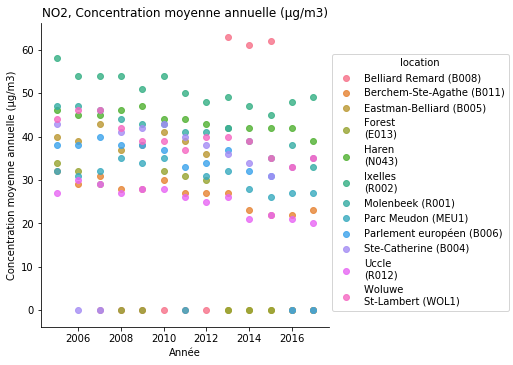

In [17]:
sns.lmplot(data=data, x='Année', 
           y="Concentration moyenne annuelle (µg/m3)", 
           hue='location', fit_reg=False)

plt.title("NO2, Concentration moyenne annuelle (µg/m3)")

Text(0.5,1,"Nombre d'heures > 200 µg/m3 (heures)a2")

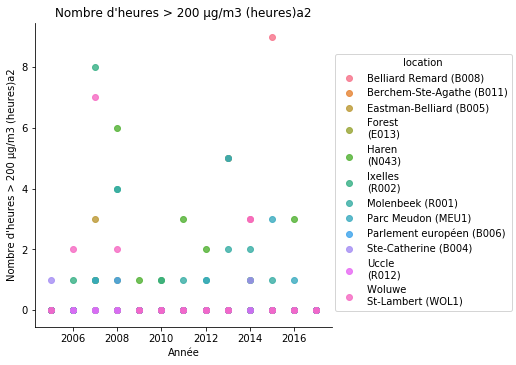

In [18]:
sns.lmplot(data=data, x='Année', y="Nombre d'heures > 200 µg/m3 (heures)a2", hue='location', fit_reg=False)

plt.title("Nombre d'heures > 200 µg/m3 (heures)a2")

Text(0.5,1,'Part des jours > 40 µg/m3 (%)a1')

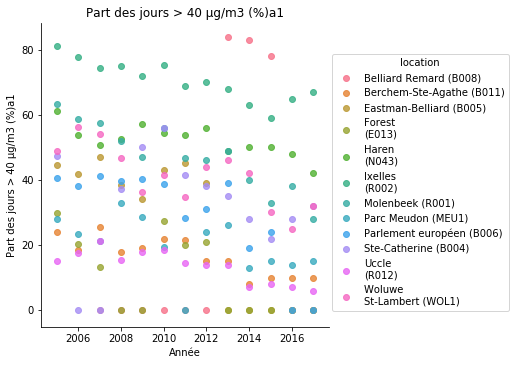

In [19]:
sns.lmplot(data=data, x='Année', y="Part des jours > 40 µg/m3 (%)a1", hue='location', fit_reg=False)

plt.title("Part des jours > 40 µg/m3 (%)a1")

# Rapport NO2 

- Belliard Remard présente les valeurs de pollution les plus élevées, dépassant 60 µg / m3 de NO2. C'est intéressant que les données des deux dernières années ont été qualifiées comme confidentielles.
- Ixelles se trouve dans la deuxième position de pollution, avec des niveaux compris entre 50 et 60 µg / m3 de NO2.
- La plupart des location ont une concentration entre trente et cinquante µg / m3 de NO2.
- Uccle est l'endroit le plus propre de Bruxelles, avec des niveaux compris entre entre vingt et trente µg / m3 de NO2, et Berchem-Ste. Agathe est la deuxième plus propre.

Pour mieux voir les tendances, faisons une visualisation supplémentaire.

## Une autre méthode pour manipuler les données

Nous découpons des données en morceaux, chacun en fonction de la mesure de la concentration.

In [20]:
concen = df1[df1['index'] == 'Concentration moyenne annuelle (µg/m3)']

concen.shape

(13, 14)

In [21]:
concen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 36
Data columns (total 14 columns):
index                        13 non-null object
Année                        13 non-null float64
Molenbeek (R001)             13 non-null float64
Ixelles
(R002)               13 non-null float64
Ste-Catherine (B004)         13 non-null object
Eastman-Belliard (B005)      13 non-null object
Parlement européen (B006)    13 non-null object
Belliard Remard (B008)       13 non-null object
Berchem-Ste-Agathe (B011)    13 non-null float64
Uccle
(R012)                 13 non-null float64
Haren
(N043)                 13 non-null float64
Parc Meudon (MEU1)           13 non-null object
Woluwe 
St-Lambert (WOL1)    13 non-null float64
Forest
(E013)                13 non-null object
dtypes: float64(7), object(7)
memory usage: 1.5+ KB


In [22]:
concen = concen[2:].replace([':', ':c', ':x'], 0)

concen.shape

(11, 14)

Nous avons perdu deux lignes. Des valeurs nulles pourraient être imputé pars la médiane.

## Tendances

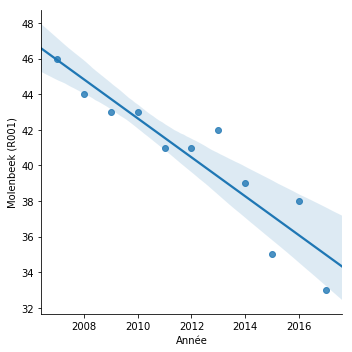

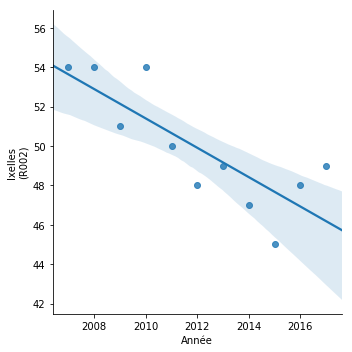

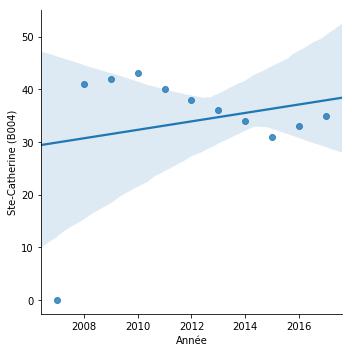

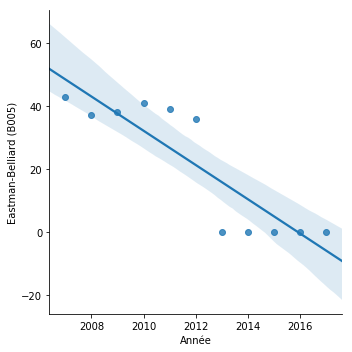

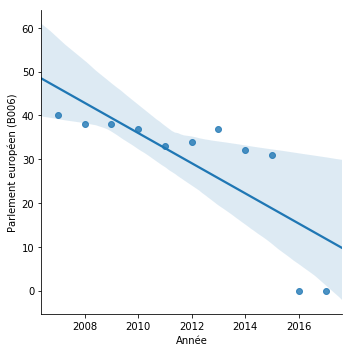

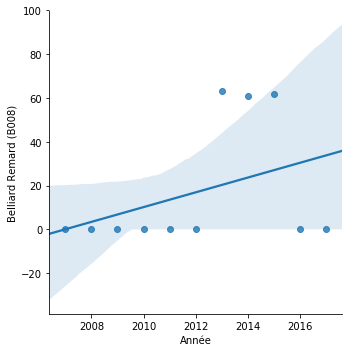

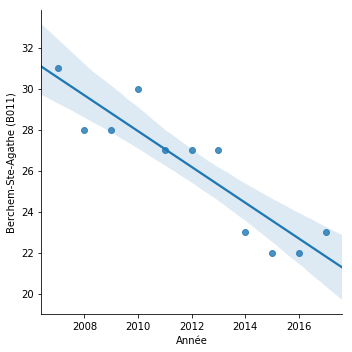

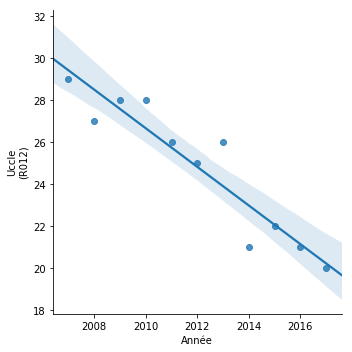

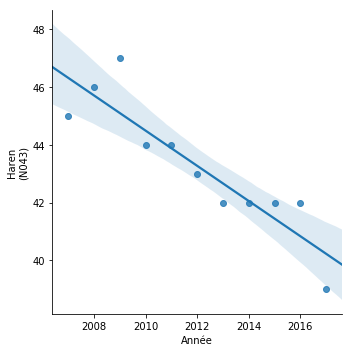

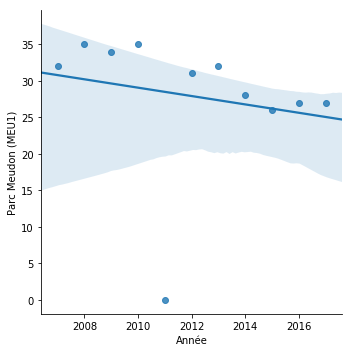

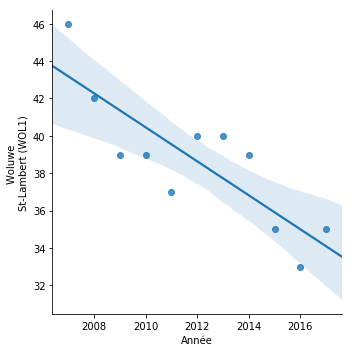

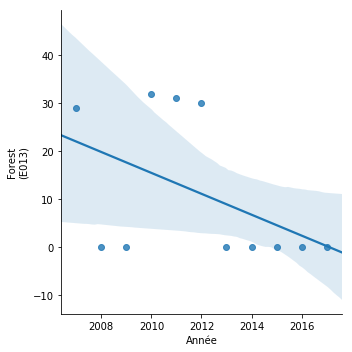

In [23]:
 list = ['Molenbeek (R001)', 'Ixelles\n(R002)',
       'Ste-Catherine (B004)', 'Eastman-Belliard (B005)',
       'Parlement européen (B006)', 'Belliard Remard (B008)',
       'Berchem-Ste-Agathe (B011)', 'Uccle\n(R012)', 'Haren\n(N043)',
       'Parc Meudon (MEU1)', 'Woluwe \nSt-Lambert (WOL1)', 'Forest\n(E013)']

for y in list: 
    sns.lmplot(data=concen, x="Année", y=y, fit_reg=True)

- La pollution à Molenbeek, Ucle et Berchem-Ste-Agathe a diminué de façon linéaire au cours des douze années de mesure, de 2005 à 2017, en fonction des niveaux de concentration de NO2.


# Particles <10µm

In [24]:
df3.head()

,Année,Molenbeek (R001),Berchem-Ste-Agathe (B011),Uccle (R012),Haren (N043),Parc Meudon (MEU1),Woluwe St-Lambert (WOL1)
Concentration moyenne annuelle (µg/m3)a1,2005.0,31.0,26.0,27.0,36.0,:,28.0
Concentration maximale journalière (µg/m3),2005.0,101.0,77.0,84.0,143.0,:,83.0
Nombre de jours de dépassements de la valeur limite journalièrea2,2005.0,42.0,17.0,23.0,66.0,:,24.0
Concentration moyenne annuelle (µg/m3)a1,2006.0,31.0,23.0,29.0,34.0,:,27.0
Concentration maximale journalière (µg/m3),2006.0,108.0,91.0,93.0,107.0,:,101.0


In [25]:
pe = df3.dropna().reset_index()

In [26]:
pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 8 columns):
index                        39 non-null object
Année                        39 non-null float64
Molenbeek (R001)             39 non-null float64
Berchem-Ste-Agathe (B011)    39 non-null float64
Uccle
(R012)                 39 non-null float64
Haren (N043)                 39 non-null float64
Parc Meudon (MEU1)           39 non-null object
Woluwe 
St-Lambert (WOL1)    39 non-null float64
dtypes: float64(6), object(2)
memory usage: 2.5+ KB


In [27]:
particle = pe.melt(id_vars=['index', 'Année'], 
               value_vars= pe.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

particle.head()


concentration  \
index                            Concentration maximale journalière (µg/m3)   
location                  Année                                               
Berchem-Ste-Agathe (B011) 2005.0                                         77   
                          2006.0                                         91   
                          2007.0                                         93   
                          2008.0                                        118   
                          2009.0                                        106   

                                                                            \
index                            Concentration moyenne annuelle (µg/m3) a1   
location                  Année                                              
Berchem-Ste-Agathe (B011) 2005.0                                       NaN   
                          2006.0                                       NaN   
                          2007.0                                       NaN   
                          2008.0                                       NaN   
                          2009.0                                       NaN   

                                                                           \
index                            Concentration moyenne annuelle (µg/m3)a1   
location                  Année                                             
Berchem-Ste-Agathe (B011) 2005.0                                       26   
                          2006.0                                       23   
                          2007.0                                       25   
                          2008.0                                       28   
                          2009.0                                       31   

                                                                                                    
index                            Nombre de jours de dépassements de la valeur limite journalièrea2  
location                  Année                                                                     
Berchem-Ste-Agathe (B011) 2005.0                                                                17  
                          2006.0                                                                17  
                          2007.0                                                                30  
                          2008.0                                                                25  
                          2009.0                                                                40

In [28]:
particle.columns = particle.columns.droplevel()

particle.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, (Berchem-Ste-Agathe (B011), 2005.0) to (Woluwe 
St-Lambert (WOL1), 2017.0)
Data columns (total 4 columns):
Concentration maximale journalière (µg/m3)                           78 non-null object
Concentration moyenne annuelle (µg/m3) a1                            42 non-null object
Concentration moyenne annuelle (µg/m3)a1                             36 non-null object
Nombre de jours de dépassements de la valeur limite journalièrea2    78 non-null object
dtypes: object(4)
memory usage: 2.9+ KB


In [29]:
particle.isna().sum()
particle = particle.fillna(0)

In [30]:
particle = particle.reset_index()

In [31]:
particle.info()

parti = particle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
location                                                             78 non-null object
Année                                                                78 non-null float64
Concentration maximale journalière (µg/m3)                           78 non-null object
Concentration moyenne annuelle (µg/m3) a1                            78 non-null object
Concentration moyenne annuelle (µg/m3)a1                             78 non-null object
Nombre de jours de dépassements de la valeur limite journalièrea2    78 non-null object
dtypes: float64(1), object(5)
memory usage: 3.7+ KB


In [32]:
cols = ['Concentration maximale journalière (µg/m3)',
       'Concentration moyenne annuelle (µg/m3) a1',
       'Concentration moyenne annuelle (µg/m3)a1',
       'Nombre de jours de dépassements de la valeur limite journalièrea2']

parti[cols] = parti[cols].apply(pd.to_numeric, errors='coerce', axis=1)

parti.head(3)

index,location,Année,Concentration maximale journalière (µg/m3),Concentration moyenne annuelle (µg/m3) a1,Concentration moyenne annuelle (µg/m3)a1,Nombre de jours de dépassements de la valeur limite journalièrea2
0,Berchem-Ste-Agathe (B011),2005.0,77.0,0.0,26.0,17.0
1,Berchem-Ste-Agathe (B011),2006.0,91.0,0.0,23.0,17.0
2,Berchem-Ste-Agathe (B011),2007.0,93.0,0.0,25.0,30.0


Text(0.5,1,'Concentration maximale journalière (µg/m3)')

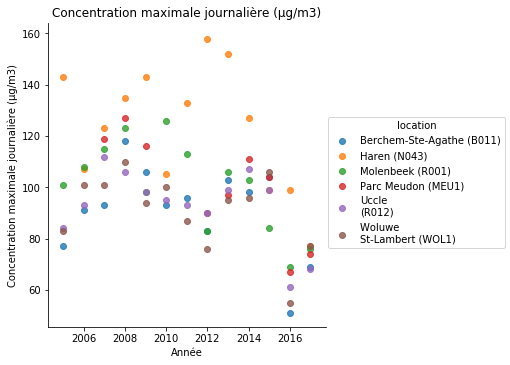

In [33]:
sns.lmplot(data=parti, x='Année', y='Concentration maximale journalière (µg/m3)', hue='location', fit_reg=False)

plt.title("Concentration maximale journalière (µg/m3)")

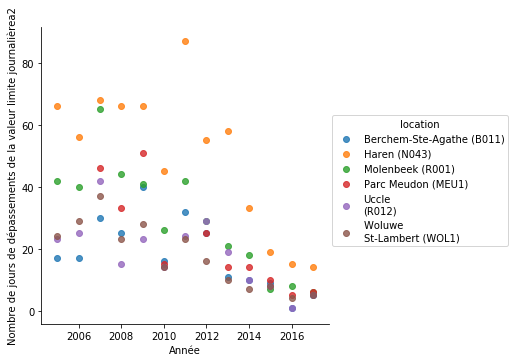

In [34]:
sns.lmplot(data=parti, x='Année', y=parti.columns[5], hue='location', fit_reg=False)

Text(0.5,1,'Concentration moyene annuele (µg/m3)')

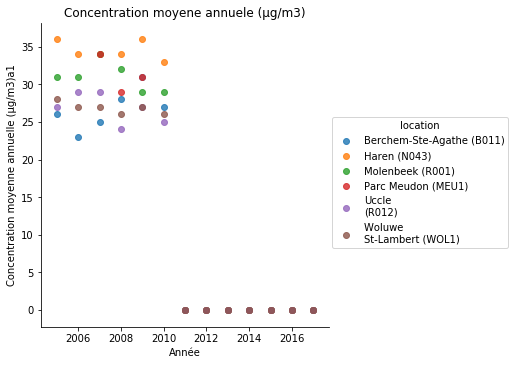

In [35]:
sns.lmplot(data=parti, x='Année', y=parti.columns[4], hue='location', fit_reg=False)

plt.title("Concentration moyene annuele (µg/m3)")

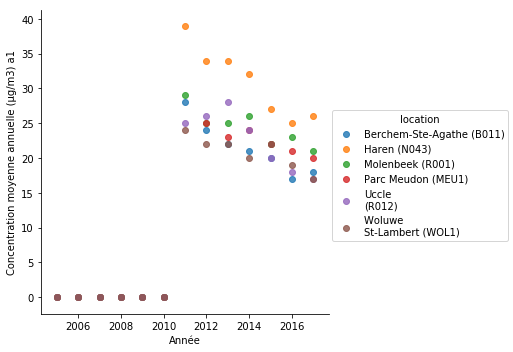

In [36]:
sns.lmplot(data=parti, x='Année', y=parti.columns[3], hue='location', fit_reg=False)

# Ozone (O3)

In [37]:
df2 = df2.dropna().reset_index()

Unités : microgrammes par mètre cube, jours\n Échelle géographique : station de mesure\nSource : Bruxelles Environnement

: = Non disponible (mesures non effectuées ou non fiables)

 La période estivale est définie comme la période du 1er avril au 30 septembre.

Valeur cible pour la santé de 120 µg/m3 comme maximum journalier de la moyenne sur 8 heures

Moyenne de la valeur cible de 120 µg/m3 comme valeur maximale sur 8 heures, calculée sur l'année en cours et les deux années qui précèdent, à ne pas dépasser plus de 25 jours par an (à partir de 2010-2012)

Seuil d'information de 180 µg/m3 en tant que valeur horaire

In [38]:
df2.columns

Index(['index', 'Année', 'Molenbeek (R001)', 'Ste-Catherine (B004)',
       'Parlement européen (B006)', 'Berchem-Ste-Agathe (B011)',
       'Uccle\n(R012)', 'Haren (N043)', 'Woluwe \nSt-Lambert (WOL1)'],
      dtype='object')

In [39]:
o3 = df2.melt(id_vars=['index', 'Année'], 
               value_vars= pe.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [40]:
o3.columns = o3.columns.droplevel()

In [41]:
o3.isna().sum()

index
Concentration moyenne annuelle (µg/m3)                                  13
Concentration moyenne estivale (µg/m3)a1                                13
Nombre de jours de dépassement du seuil d'informationa4                 13
Nombre de jours de dépassements de la valeur cible par ana2             13
Nombre moyen de jours de dépassements de la valeur cible sur 3 ansa3    13
dtype: int64

In [42]:
o3.shape

(78, 5)

In [43]:
o3 = o3.fillna(0)

In [44]:
o3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 78 entries, (Berchem-Ste-Agathe (B011), 2005.0) to (Woluwe 
St-Lambert (WOL1), 2017.0)
Data columns (total 5 columns):
Concentration moyenne annuelle (µg/m3)                                  78 non-null float64
Concentration moyenne estivale (µg/m3)a1                                78 non-null float64
Nombre de jours de dépassement du seuil d'informationa4                 78 non-null float64
Nombre de jours de dépassements de la valeur cible par ana2             78 non-null float64
Nombre moyen de jours de dépassements de la valeur cible sur 3 ansa3    78 non-null float64
dtypes: float64(5)
memory usage: 3.5+ KB


In [45]:
o3.sample()

,index,Concentration moyenne annuelle (µg/m3),Concentration moyenne estivale (µg/m3)a1,Nombre de jours de dépassement du seuil d'informationa4,Nombre de jours de dépassements de la valeur cible par ana2,Nombre moyen de jours de dépassements de la valeur cible sur 3 ansa3
location,Année,,,,,
Molenbeek (R001),2016.0,35.0,45.0,0.0,0.0,1.0


In [46]:
o3= o3.reset_index()

In [47]:
o3.columns

Index(['location', 'Année', 'Concentration moyenne annuelle (µg/m3)',
       'Concentration moyenne estivale (µg/m3)a1',
       'Nombre de jours de dépassement du seuil d'informationa4',
       'Nombre de jours de dépassements de la valeur cible par ana2',
       'Nombre moyen de jours de dépassements de la valeur cible sur 3 ansa3'],
      dtype='object', name='index')

In [48]:
o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
location                                                                78 non-null object
Année                                                                   78 non-null float64
Concentration moyenne annuelle (µg/m3)                                  78 non-null float64
Concentration moyenne estivale (µg/m3)a1                                78 non-null float64
Nombre de jours de dépassement du seuil d'informationa4                 78 non-null float64
Nombre de jours de dépassements de la valeur cible par ana2             78 non-null float64
Nombre moyen de jours de dépassements de la valeur cible sur 3 ansa3    78 non-null float64
dtypes: float64(6), object(1)
memory usage: 4.3+ KB


Text(0.5,1,'Concentration moyene annuele O3 (µg/m3)')

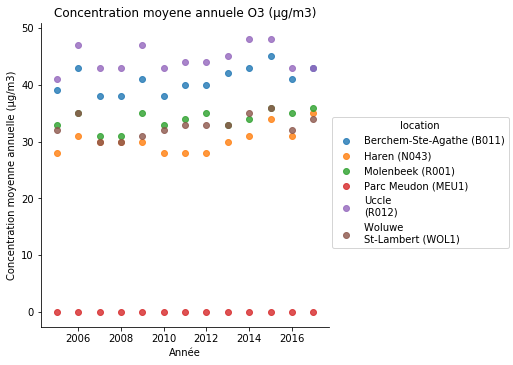

In [49]:
sns.lmplot(data=o3, x='Année', y=o3.columns[2], hue='location', fit_reg=False)

plt.title("Concentration moyene annuele O3 (µg/m3)")

# Particles <2,5µm 

In [50]:
df4 = df4.dropna().reset_index()

In [51]:
new = df4.melt(id_vars=['index', 'Année'], 
               value_vars= pe.columns[2:], 
               var_name='location', 
               value_name='concentration').pivot_table(index=['location', 'Année'], 
                                                       columns=['index'], 
                                                       aggfunc=lambda x:x)

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [52]:
new.columns = new.columns.droplevel()

In [53]:
new.isna().sum()

index
Concentration maximale journalière (µg/m3)    12
Concentration moyenne annuelle (µg/m3)a1      12
dtype: int64

In [54]:
new = new.fillna(0)

new.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, (Berchem-Ste-Agathe (B011), 2006.0) to (Woluwe 
St-Lambert (WOL1), 2017.0)
Data columns (total 2 columns):
Concentration maximale journalière (µg/m3)    72 non-null object
Concentration moyenne annuelle (µg/m3)a1      72 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [55]:
new = new.reset_index()

In [56]:
new.columns

Index(['location', 'Année', 'Concentration maximale journalière (µg/m3)',
       'Concentration moyenne annuelle (µg/m3)a1'],
      dtype='object', name='index')

In [57]:
cols = ['Concentration maximale journalière (µg/m3)',
       'Concentration moyenne annuelle (µg/m3)a1']

new[cols] = new[cols].apply(pd.to_numeric, errors='coerce', axis=1)

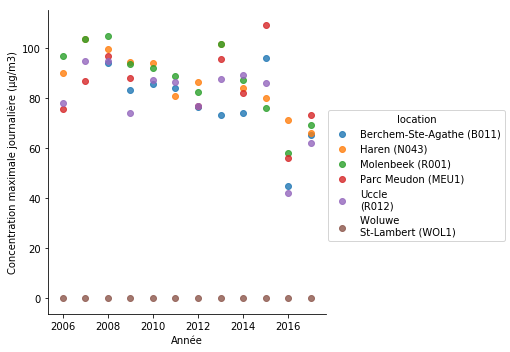

In [58]:
sns.lmplot(data=new, x='Année', y=new.columns[2], hue='location', fit_reg=False)

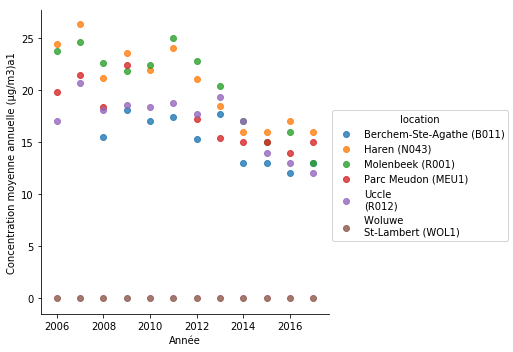

In [59]:
sns.lmplot(data=new, x='Année', y=new.columns[3], hue='location', fit_reg=False)

In [60]:
#Trial coding

no2 = df1.T
no2.columns= no2.iloc[0]
no2.columns.unique()
 no2.reset_index()

IndentationError: unexpected indent (<ipython-input-60-02a3c32d3397>, line 6)

In [ ]:
df.columns = [col[1] for col in df.columns]
#This strategy is also useful if you want to combine the names from both levels like in the example below where the bottom level contains two 'y's:

cols = pd.MultiIndex.from_tuples([("A", "x"), ("A", "y"), ("B", "y")])
df = pd.DataFrame([[1,2, 8 ], [3,4, 9]], columns=cols)

   A     B
   x  y  y
0  1  2  8
1  3  4  9
Dropping the top level would leave two columns with the index 'y'. That can be avoided by joining the names with the list comprehension.

df.columns = ['_'.join(col) for col in df.columns]

    A_x A_y B_y
0   1   2   8
1   3   4   9